<a href="https://colab.research.google.com/github/josefinasolisb/Rainfall_Prediction_MP/blob/main/Rainfall_prediction_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Unir archivos csv en 1 solo



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

def unir_archivos_csv(directory):
    """
    Combina todos los archivos CSV dentro del directorio dado en un solo DataFrame.

    Args:
    - directory: Ruta al directorio que contiene los archivos CSV.

    Returns:
    - DataFrame combinado de todos los archivos CSV.
    """
    dataframe_MP = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):  # Asegurarse de que solo se consideren archivos CSV
            filepath = os.path.join(directory, filename)
            try:
                # Leer el archivo CSV a partir de la línea 11
                df = pd.read_csv(filepath, skiprows=10)
                dataframe_MP.append(df)
            except Exception as e:
                print(f"Error al leer el archivo {filepath}: {e}")
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(dataframe_MP, ignore_index=True)
    return combined_df

# Directorio donde se encuentran los archivos CSV
directory = '/content/drive/MyDrive/Colab Notebooks/Data analytics/Trabajo final /Rainfall_prediction/Estacion Macchu Picchu/Todo'

# Unir todos los archivos CSV en un solo DataFrame
df_completo = unir_archivos_csv(directory)

# Guardar el DataFrame combinado en un nuevo archivo CSV
df_completo.to_csv('MP_dataset_completo.csv', index=False)

print("Archivos CSV combinados y guardados correctamente")


Archivos CSV combinados y guardados correctamente


2. Ordenar dataset creado

In [ ]:
import pandas as pd
import numpy as np
import os
import missingno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset_MP = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data analytics/Trabajo final /Rainfall_prediction/Estacion Macchu Picchu/MP_dataset_completo.csv", sep = ",")

In [ ]:
dataset_MP['AÑO / MES / DÍA'] = pd.to_datetime(dataset_MP['AÑO / MES / DÍA'])
dataset_MP = dataset_MP.sort_values(by=['AÑO / MES / DÍA'], ascending=True)
print(dataset_MP.head())
dataset_MP.to_csv('MP_dataset_ordenado.csv', index=False)
file_path = os.path.abspath('MP_dataset_ordenado.csv')

# Imprimir la ruta completa del archivo CSV
print("El archivo CSV guardado se encuentra en:", file_path)

      AÑO / MES / DÍA   HORA TEMPERATURA (°C) PRECIPITACIÓN (mm/hora)  \
31120      2020-01-01  23:00             13.3                     0.8   
31119      2020-01-01  22:00             13.5                     0.0   
31118      2020-01-01  21:00             13.4                     0.0   
31117      2020-01-01  20:00             13.3                     0.0   
31116      2020-01-01  19:00             13.6                     0.6   

      HUMEDAD (%) DIRECCION DEL VIENTO (°) VELOCIDAD DEL VIENTO (m/s)  
31120          97                      171                        0.1  
31119          98                      249                        0.9  
31118          96                      222                        0.4  
31117          97                      102                        2.4  
31116          96                      100                        0.2  
El archivo CSV guardado se encuentra en: /content/MP_dataset_ordenado.csv


In [ ]:
dataset_MP.head()

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
31120,2020-01-01,23:00,13.3,0.8,97,171,0.1
31119,2020-01-01,22:00,13.5,0.0,98,249,0.9
31118,2020-01-01,21:00,13.4,0.0,96,222,0.4
31117,2020-01-01,20:00,13.3,0.0,97,102,2.4
31116,2020-01-01,19:00,13.6,0.6,96,100,0.2


Reporte de valores nulos

In [ ]:
#title funciones de graficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
def report_missings(data, opt = 0):
  """
  data = dataframe
  opt = opcion de graficar {0: todo, >0 solo faltantes}
        default= 0
  """
  data_rep = round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 3)
  data_rep2 = data.isna().sum().sort_values(ascending=False)
  df = pd.concat([data_rep2, data_rep], axis=1).reset_index()
  df.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df["Cant. No Nulos"] = len(data) - df["Cant. Nulos"]
  df = df.reindex(columns=["Variable","Cant. No Nulos","Cant. Nulos","% Nulos"])

  print("*"*100)
  print("*"*20, "Reporte General", "*"*20)
  print("*"*100)
  print(df)

  if opt:
    data_rep = data_rep[data_rep > 0] # opcional
  miss = data_rep.to_frame()
  miss.columns = ['Cantidad (%)']
  miss.index.names = ['Variable']
  miss['Variable'] = miss.index

  fig = plt.figure(figsize=(15,15))
  #plot the missing value count
  #plt.figure(figsize=(10,6))
  ax1 = fig.add_subplot(3,2,1)
  print("*"*70, "Graficas de datos faltantes", "*"*70)
  print("*"*180)
  missingno.bar(data, figsize=(10,5), fontsize=12, ax=ax1, color="dodgerblue");
  plt.title("Conteo de muestras para cada variable (porcentaje y cantidad)")

  ax3 = fig.add_subplot(3,2,3)
  sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Valores perdidos'})
  plt.title("Distribución de valores perdidos")
  plt.tight_layout()


  ax2 = fig.add_subplot(3,2,2)
  #sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x = 'Variable', y = 'Cantidad (%)', data=miss, ax=ax2)
  plt.ylim([0,100])
  plt.title("Porcentaje de datos faltantes por variable")
  plt.xticks(rotation = 90)
  #plt.savefig("missing1.png", dpi=100)



  ax4 = fig.add_subplot(3,2,4)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12, ax=ax4)
  plt.title("Correlación de nulidad entre variables")
  ax5 = fig.add_subplot(3,2,5)
  missingno.dendrogram(data, figsize=(10,5), fontsize=12,ax=ax5)
  plt.title("Dendograma basado en la correlación de valores faltantes")
  plt.tight_layout()


****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
                     Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0  VELOCIDAD DEL VIENTO (m/s)           28566         3269   10.269
1     PRECIPITACIÓN (mm/hora)           30503         1332    4.184
2                 HUMEDAD (%)           31099          736    2.312
3            TEMPERATURA (°C)           31202          633    1.988
4    DIRECCION DEL VIENTO (°)           31325          510    1.602
5             AÑO / MES / DÍA           31835            0    0.000
6                        HORA           31835            0    0.000
********************************************************************** Graficas de datos faltantes **********************************************************************
**************************

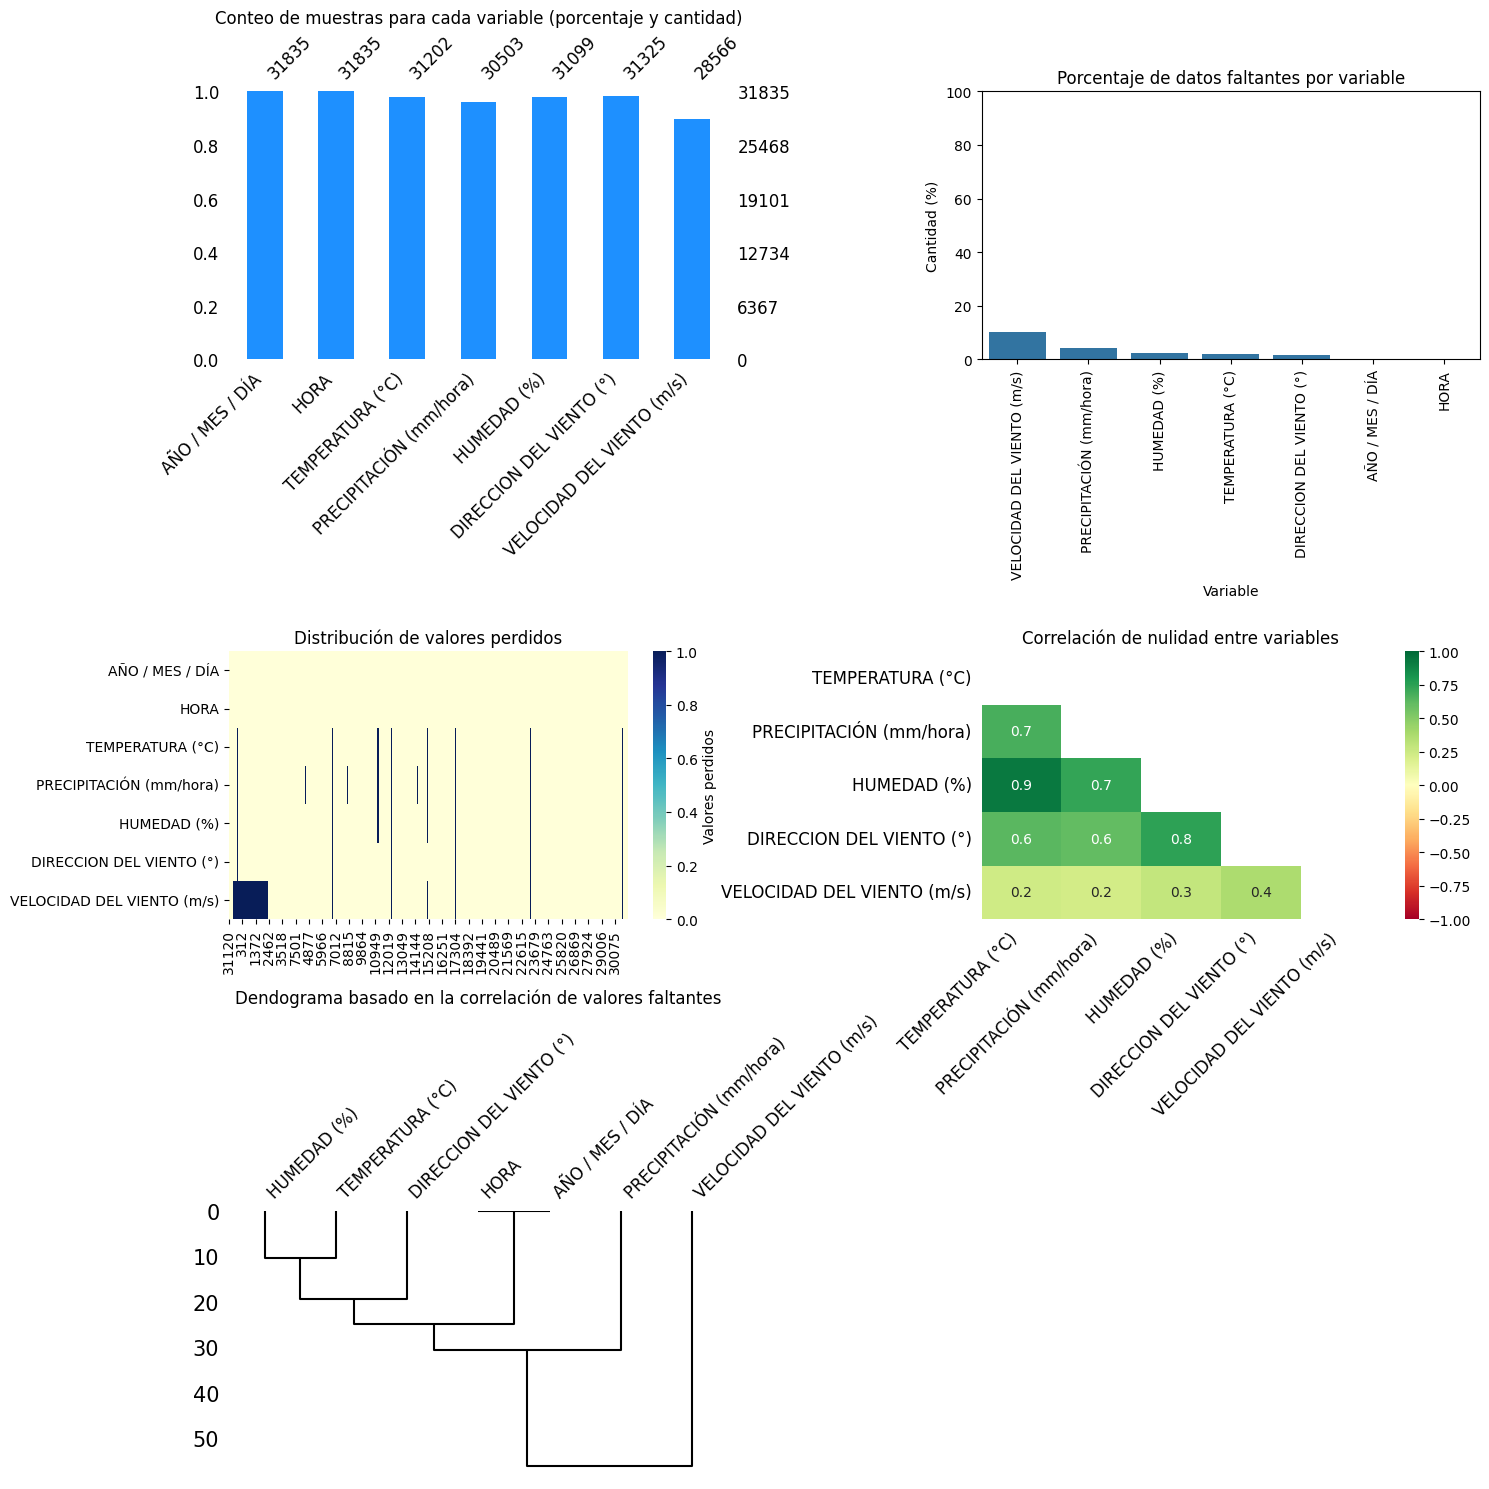

In [ ]:
dataset_MP.replace('S/D', np.nan, inplace=True)
report_missings(dataset_MP)

Imputacion de datos nulos

In [ ]:
data_MP = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data analytics/Trabajo final /Rainfall_prediction/Estacion Macchu Picchu/MP_dataset_ordenado.csv", sep = ",")
data_MP = data_MP.replace('S/D', 0.0)
data_MP.to_csv('MP_data.csv', index=False)
file_path = os.path.abspath('MP_data.csv')

# Imprimir la ruta completa del archivo CSV
print("El archivo CSV guardado se encuentra en:", file_path)

El archivo CSV guardado se encuentra en: /content/MP_data.csv


In [ ]:
na_variables = dataset_MP.columns[dataset_MP.isnull().any()].tolist()
na_variables

['TEMPERATURA (°C)',
 'PRECIPITACIÓN (mm/hora)',
 'HUMEDAD (%)',
 'DIRECCION DEL VIENTO (°)',
 'VELOCIDAD DEL VIENTO (m/s)']

In [ ]:
na_variables = ['TEMPERATURA (°C)',
 'PRECIPITACIÓN (mm/hora)',
 'HUMEDAD (%)',
 'DIRECCION DEL VIENTO (°)',
 'VELOCIDAD DEL VIENTO (m/s)']
na_variables

['TEMPERATURA (°C)',
 'PRECIPITACIÓN (mm/hora)',
 'HUMEDAD (%)',
 'DIRECCION DEL VIENTO (°)',
 'VELOCIDAD DEL VIENTO (m/s)']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Copy the data
dataimp = dataset_MP[na_variables].copy(deep=True)

# Init
ii_imp = IterativeImputer(
    estimator=ExtraTreesRegressor(), max_iter=5, random_state=123, verbose=3
)

# Tranform
dataimp.loc[:, :] = ii_imp.fit_transform(dataimp)


[IterativeImputer] Completing matrix with shape (31835, 5)
[IterativeImputer] Ending imputation round 1/5, elapsed time 17.57
[IterativeImputer] Change: 227.77832394337932, scaled tolerance: 0.36 
[IterativeImputer] Ending imputation round 2/5, elapsed time 37.42
[IterativeImputer] Change: 130.4171111111111, scaled tolerance: 0.36 
[IterativeImputer] Ending imputation round 3/5, elapsed time 56.67
[IterativeImputer] Change: 103.95916666666658, scaled tolerance: 0.36 
[IterativeImputer] Ending imputation round 4/5, elapsed time 74.90
[IterativeImputer] Change: 228.90314465408804, scaled tolerance: 0.36 
[IterativeImputer] Ending imputation round 5/5, elapsed time 94.22
[IterativeImputer] Change: 185.38899999999998, scaled tolerance: 0.36 


****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
                     Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0            TEMPERATURA (°C)           31835            0      0.0
1     PRECIPITACIÓN (mm/hora)           31835            0      0.0
2                 HUMEDAD (%)           31835            0      0.0
3    DIRECCION DEL VIENTO (°)           31835            0      0.0
4  VELOCIDAD DEL VIENTO (m/s)           31835            0      0.0
********************************************************************** Graficas de datos faltantes **********************************************************************
******************************************************************************************************************************************************************

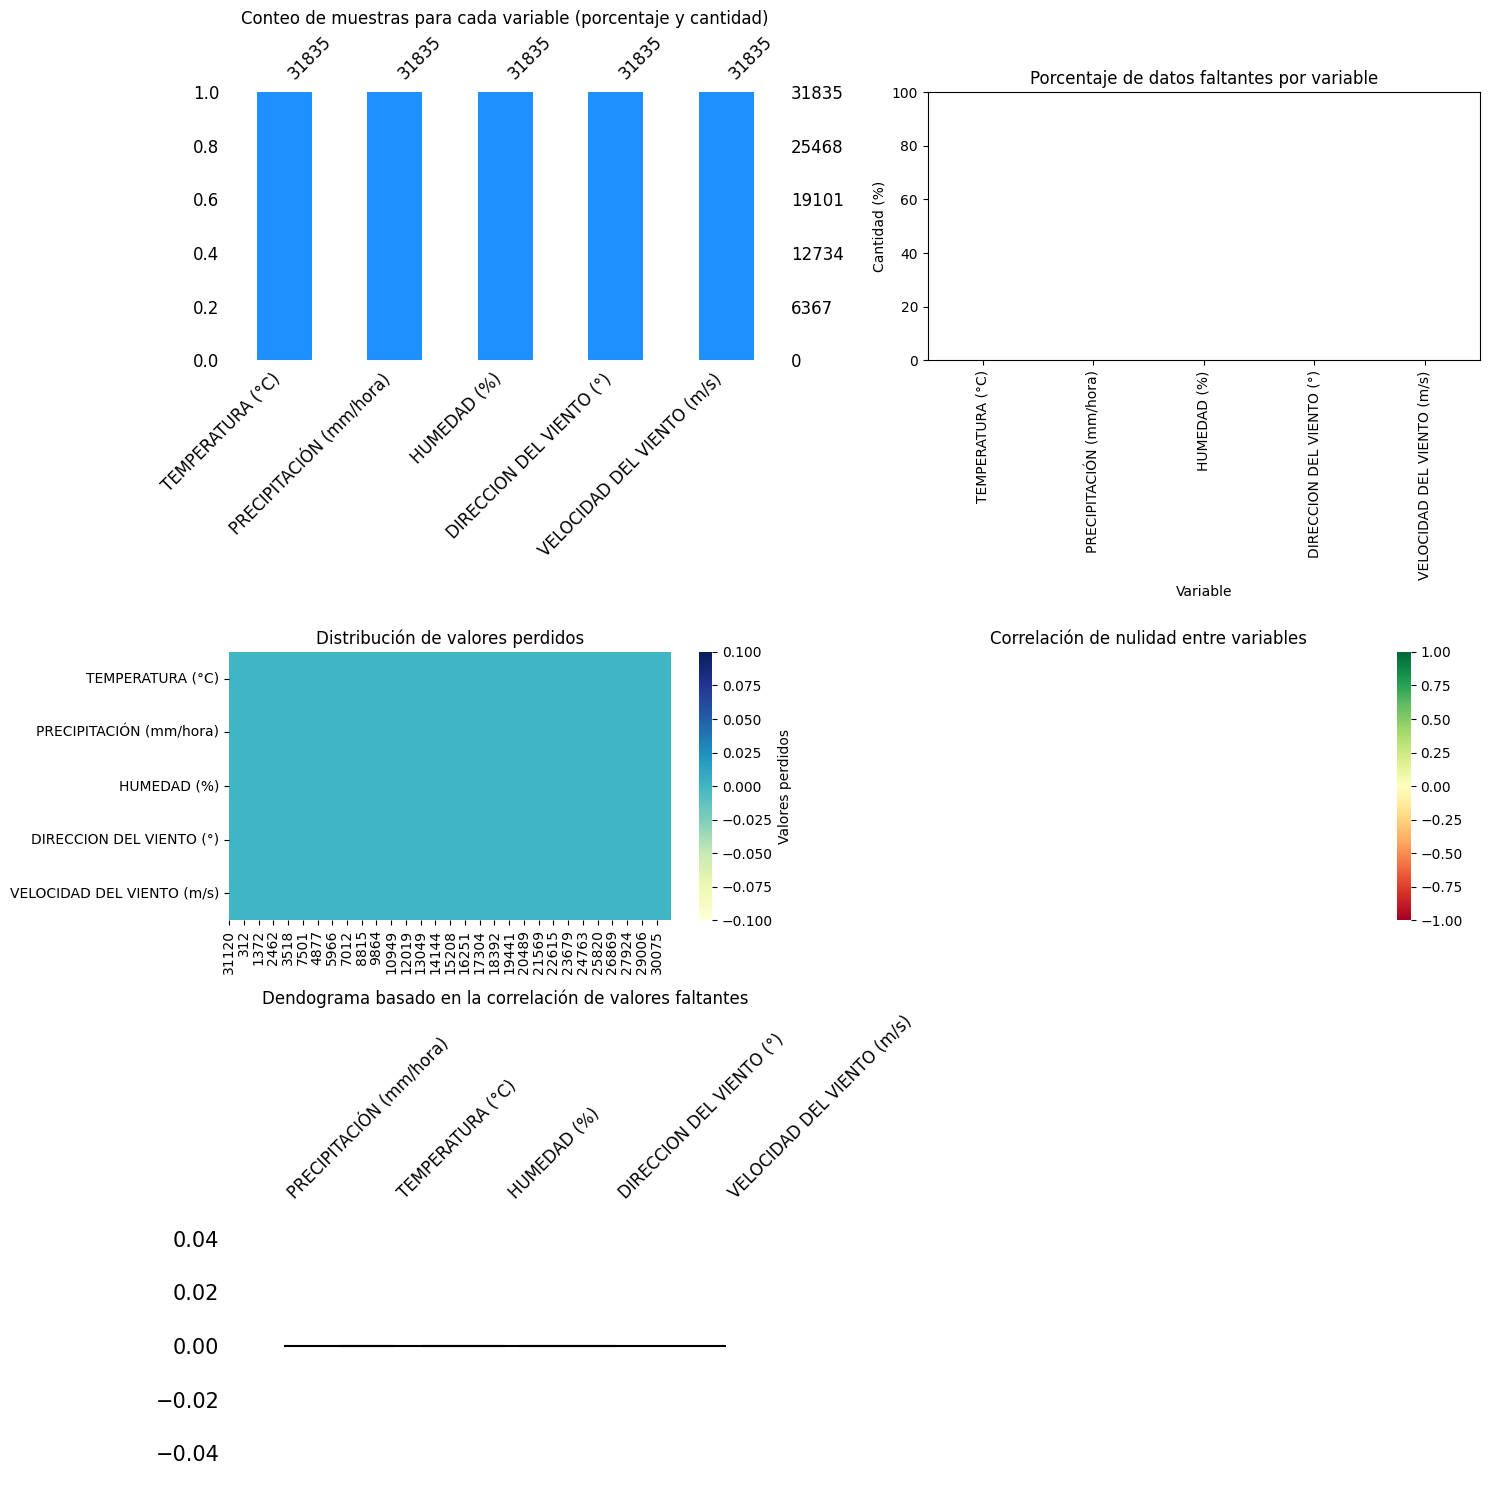

In [ ]:
report_missings(dataimp)

 Union de variables


In [ ]:
data_imp_final = pd.concat([data_MP, dataimp.loc[:, ~dataimp.columns.isin(na_variables)]], axis=1)
data_imp_final.drop('HORA', axis=1, inplace=True)
data_imp_final

,AÑO / MES / DÍA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
0,2020-01-01,13.3,0.8,97,171,0.1
1,2020-01-01,13.5,0.0,98,249,0.9
2,2020-01-01,13.4,0.0,96,222,0.4
3,2020-01-01,13.3,0.0,97,102,2.4
4,2020-01-01,13.6,0.6,96,100,0.2
...,...,...,...,...,...,...
31830,2023-12-31,14.1,0.0,97,98,0.0
31831,2023-12-31,14.3,0.0,95,208,0.0
31832,2023-12-31,13.5,0.2,100,242,0.0
31833,2023-12-31,17.8,0.0,90,235,0.0


In [ ]:
#Guardar datos
data_imp_final.to_csv('MP_data_imp.csv', index=False)
file_path = os.path.abspath('MP_data_imp.csv')

# Imprimir la ruta completa del archivo CSV
print("El archivo CSV guardado se encuentra en:", file_path)

El archivo CSV guardado se encuentra en: /content/MP_data_imp.csv


Valores diario imputados

In [ ]:
data_MP_horas_imp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data analytics/Trabajo final /Rainfall_prediction/Estacion Macchu Picchu/MP_data_imp.csv", sep = ",")
data_MP_horas_imp['AÑO / MES / DÍA'] = pd.to_datetime(data_MP_horas_imp['AÑO / MES / DÍA'])

# Cambiar el nombre de la columna de precipitación
data_MP_horas_imp = data_MP_horas_imp.rename(columns={'PRECIPITACIÓN (mm/hora)': 'PRECIPITACIÓN (mm/dia)'})

# Agrupar por día y calcular el promedio de las variables y la suma de la precipitación por día
data_MP_diario_imp = data_MP_horas_imp.groupby(data_MP_horas_imp['AÑO / MES / DÍA'].dt.date).agg({
    'TEMPERATURA (°C)': 'mean',
    'HUMEDAD (%)': 'mean',
    'DIRECCION DEL VIENTO (°)': 'mean',
    'VELOCIDAD DEL VIENTO (m/s)': 'mean',
    'PRECIPITACIÓN (mm/dia)': 'sum'
}).reset_index()

data_MP_diario_imp = data_MP_diario_imp.round(2)



# Imprimir el DataFrame con el promedio diario y la suma diaria de la precipitación
print(data_MP_diario_imp)


data_MP_diario_imp.to_csv('MP_data_diario_imp.csv', index=False)
file_path = os.path.abspath('MP_data_diario_imp.csv')

# Imprimir la ruta completa del archivo CSV
print("El archivo CSV guardado se encuentra en:", file_path)

     AÑO / MES / DÍA  TEMPERATURA (°C)  HUMEDAD (%)  DIRECCION DEL VIENTO (°)  \
0         2020-01-01             15.34        90.00                    189.25   
1         2020-01-02             14.00        90.80                    199.80   
2         2020-01-03             14.97        86.33                    206.33   
3         2020-01-04             15.09        94.92                    250.96   
4         2020-01-05             13.97        87.38                    163.88   
...              ...               ...          ...                       ...   
1407      2023-12-27             16.18        87.67                    203.25   
1408      2023-12-28             15.68        81.12                    177.75   
1409      2023-12-29             15.77        92.04                    166.17   
1410      2023-12-30             15.70        88.17                    195.35   
1411      2023-12-31             15.97        91.58                    200.08   

      VELOCIDAD DEL VIENTO 

Revision de datos duplicados

In [ ]:
data_MP_diario_imp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data analytics/Trabajo final /Rainfall_prediction/Estacion Macchu Picchu/MP_data_diario_imp.csv", sep = ",")
bool_series = data_MP_diario_imp.duplicated(keep='first')
data_MP_diario_imp[~bool_series]

,AÑO / MES / DÍA,TEMPERATURA (°C),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),PRECIPITACIÓN (mm/dia)
0,2020-01-01,15.34,90.00,189.25,1.12,5.4
1,2020-01-02,14.00,90.80,199.80,0.55,16.8
2,2020-01-03,14.97,86.33,206.33,0.58,4.0
3,2020-01-04,15.09,94.92,250.96,0.92,14.4
4,2020-01-05,13.97,87.38,163.88,0.89,19.6
...,...,...,...,...,...,...
1407,2023-12-27,16.18,87.67,203.25,0.00,4.0
1408,2023-12-28,15.68,81.12,177.75,0.00,1.6
1409,2023-12-29,15.77,92.04,166.17,0.00,1.4
1410,2023-12-30,15.70,88.17,195.35,0.00,2.2


In [ ]:
data_MP_diario_imp[data_MP_diario_imp.duplicated(keep=False)]

,AÑO / MES / DÍA,TEMPERATURA (°C),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),PRECIPITACIÓN (mm/dia)


Analisis Univariante

In [ ]:
varNumericas   = data_MP_diario_imp.select_dtypes(include=np.number).columns
varCategoricas = data_MP_diario_imp.select_dtypes(exclude=np.number).columns
print(varNumericas)
print(varCategoricas)

Index(['TEMPERATURA (°C)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)',
       'VELOCIDAD DEL VIENTO (m/s)', 'PRECIPITACIÓN (mm/dia)'],
      dtype='object')
Index(['AÑO / MES / DÍA'], dtype='object')


In [ ]:
data_diario_imp_nofecha = data_MP_diario_imp.drop('AÑO / MES / DÍA', axis=1)
#Guardar archivo
data_diario_imp_nofecha.to_csv('MP_data_diario_imp_nofecha.csv', index=False)
file_path = os.path.abspath('MP_data_diario_imp_nofecha.csv')

# Imprimir la ruta completa del archivo CSV
print("El archivo CSV guardado se encuentra en:", file_path)

El archivo CSV guardado se encuentra en: /content/MP_data_diario_imp_nofecha.csv


Analisis Numerico

#################### TEMPERATURA (°C) ####################
                     Histograma                     


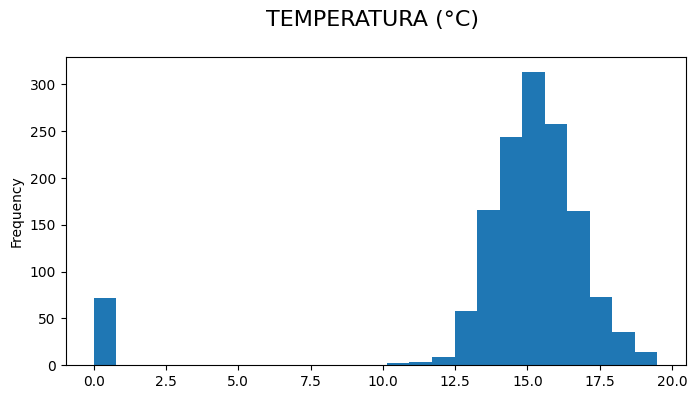



                     Boxplot                     


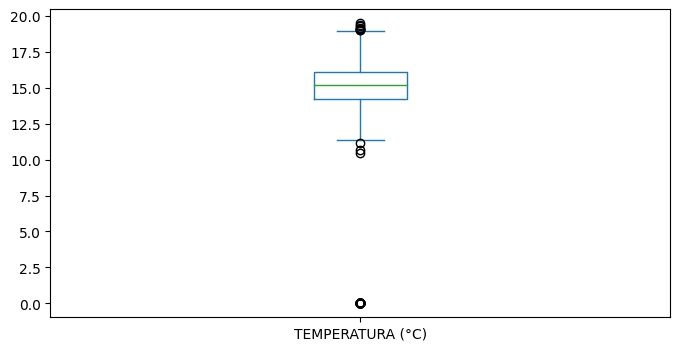




#################### HUMEDAD (%) ####################
                     Histograma                     


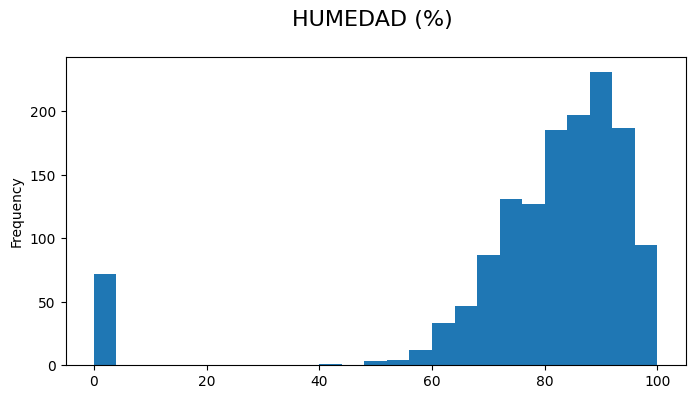



                     Boxplot                     


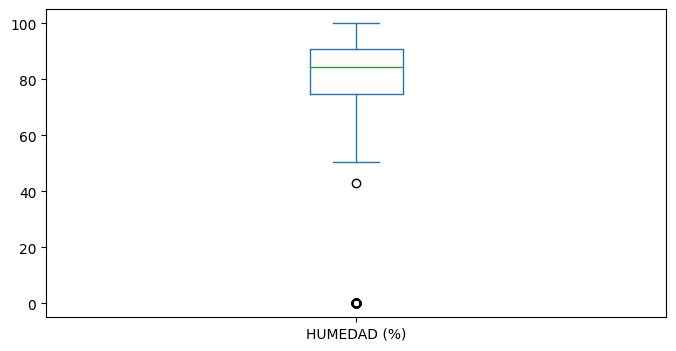




#################### DIRECCION DEL VIENTO (°) ####################
                     Histograma                     


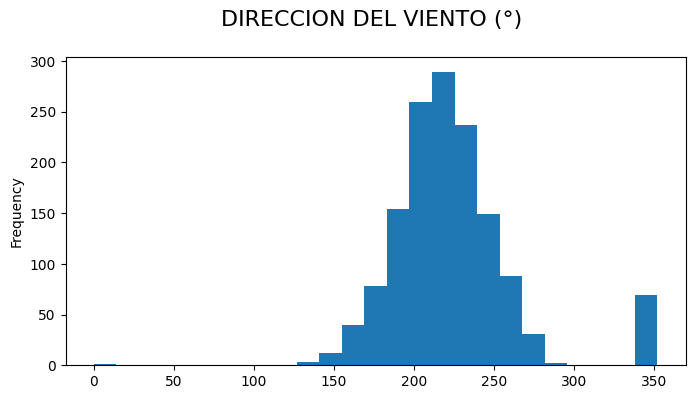



                     Boxplot                     


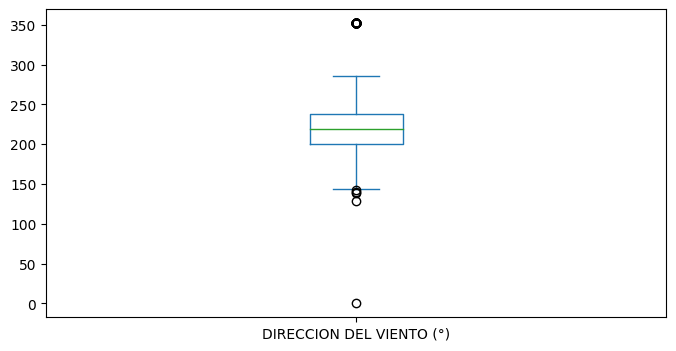




#################### VELOCIDAD DEL VIENTO (m/s) ####################
                     Histograma                     


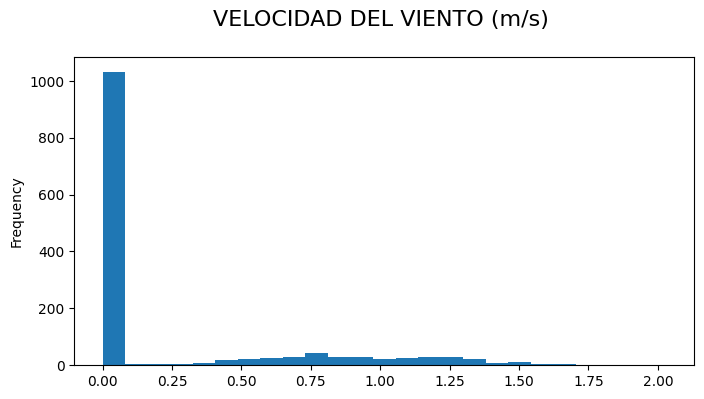



                     Boxplot                     


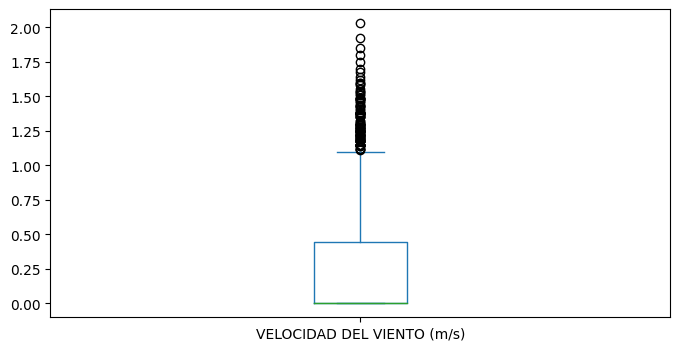




#################### PRECIPITACIÓN (mm/dia) ####################
                     Histograma                     


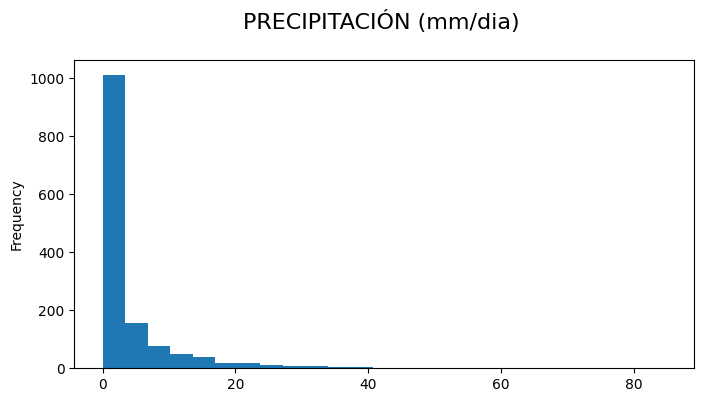



                     Boxplot                     


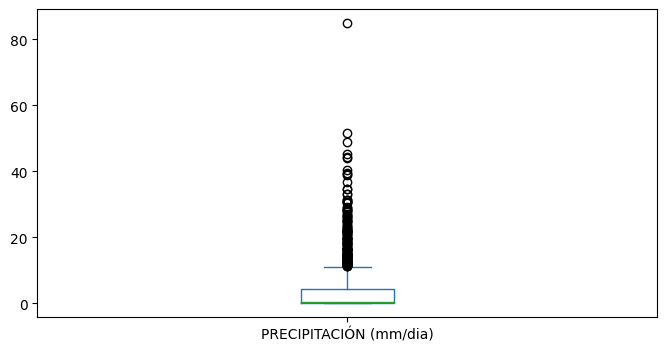

In [ ]:
def analisisNumericas(df, variable):
  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.title(f'{variable} \n',fontdict={'fontsize':16})
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()
for var in data_diario_imp_nofecha.columns:
  print("#"*20,var,"#"*20)
  analisisNumericas(data_diario_imp_nofecha, var)
  print("\n\n")


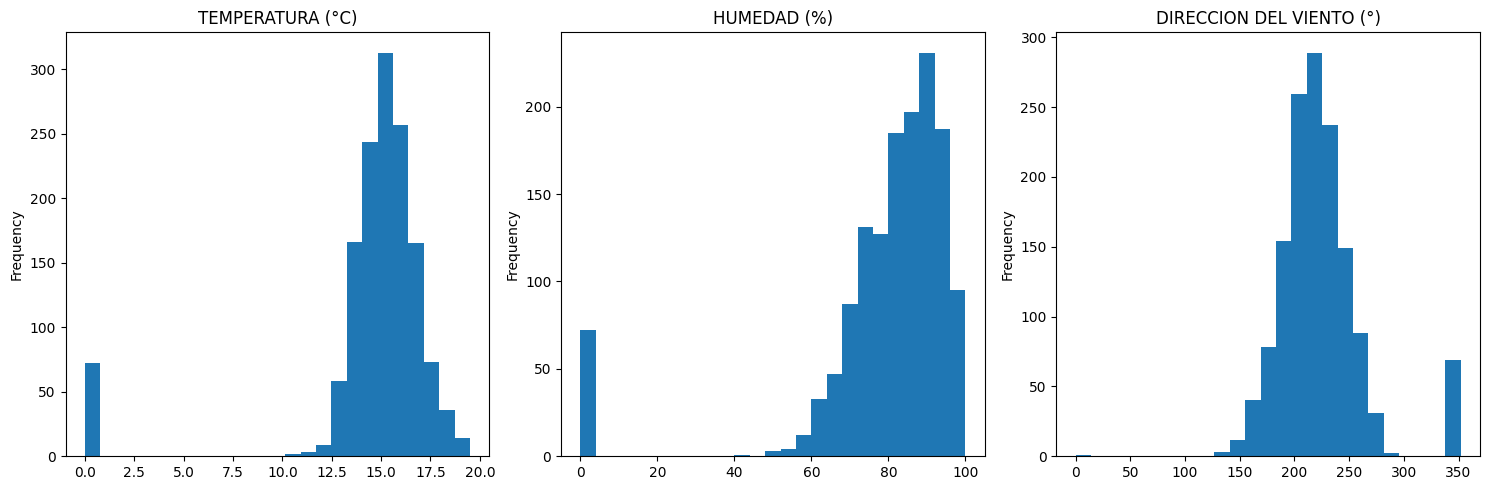

In [ ]:
# prompt: histograma de las variables pequeñas juntas en un cuadro

import matplotlib.pyplot as plt

# Define the variables to plot
variables = ['TEMPERATURA (°C)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)']

# Create the figure and subplots
fig, axes = plt.subplots(1, len(variables), figsize=(15, 5))

# Plot the histogram for each variable
for i, variable in enumerate(variables):
    data_diario_imp_nofecha[variable].plot.hist(ax=axes[i], bins=25)
    axes[i].set_title(variable)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Escalamiento y transformación: Variable numericas

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

Prueba de MinMaxScaler

In [ ]:
#Metodo no aplicable
minmax_scaler = MinMaxScaler()
data_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(data_diario_imp_nofecha), columns=data_diario_imp_nofecha.columns)
data_minmax_scaled

,TEMPERATURA (°C),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),PRECIPITACIÓN (mm/dia)
0,0.786667,0.9000,0.537642,0.551724,0.063604
1,0.717949,0.9080,0.567614,0.270936,0.197880
2,0.767692,0.8633,0.586165,0.285714,0.047114
3,0.773846,0.9492,0.712955,0.453202,0.169611
4,0.716410,0.8738,0.465568,0.438424,0.230860
...,...,...,...,...,...
1407,0.829744,0.8767,0.577415,0.000000,0.047114
1408,0.804103,0.8112,0.504972,0.000000,0.018846
1409,0.808718,0.9204,0.472074,0.000000,0.016490
1410,0.805128,0.8817,0.554972,0.000000,0.025913


In [ ]:
def analisisNumericas(df, variable):
  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.title(f'{variable} \n',fontdict={'fontsize':16})
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()
for var in data_minmax_scaled.columns:
  print("#"*20,var,"#"*20)
  analisisNumericas(data_minmax_scaled, var)
  print("\n\n")

Prueba de StandardScaler

In [ ]:
#Metodo no aplicable
standard_scaler = StandardScaler()
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(data_diario_imp_nofecha), columns=data_diario_imp_nofecha.columns)
data_standard_scaled

,TEMPERATURA (°C),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),PRECIPITACIÓN (mm/dia)
0,0.218898,0.523202,-0.873553,1.927953,0.235699
1,-0.150684,0.561876,-0.605262,0.663494,1.815676
2,0.116849,0.345784,-0.439202,0.730044,0.041667
3,0.149946,0.761049,0.695757,1.484283,1.483049
4,-0.158958,0.396544,-1.518722,1.417733,2.203741
...,...,...,...,...,...
1407,0.450576,0.410563,-0.517527,-0.556598,0.041667
1408,0.312672,0.093917,-1.166002,-0.556598,-0.290960
1409,0.337495,0.621821,-1.460486,-0.556598,-0.318679
1410,0.318188,0.434734,-0.718427,-0.556598,-0.207803


In [ ]:
def analisisNumericas(df, variable):
  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.title(f'{variable} \n',fontdict={'fontsize':16})
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()
for var in data_standard_scaled.columns:
  print("#"*20,var,"#"*20)
  analisisNumericas(data_standard_scaled, var)
  print("\n\n")

Prueba de PowerTranformer y MinMax: Normalización de las variables

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, LabelEncoder,  MinMaxScaler, StandardScaler

In [ ]:
#Utilizando PowerTransformer
prueba1 = ['TEMPERATURA (°C)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)',
        'PRECIPITACIÓN (mm/dia)']
#Utilizando Min Max
prueba2 = ['VELOCIDAD DEL VIENTO (m/s)']

In [ ]:
prueba1trans = Pipeline(
    steps=[
        ("encoder", PowerTransformer())])
prueba2trans = Pipeline(
    steps=[
        ("scaler", MinMaxScaler())
    ])

preprocessor  = ColumnTransformer(transformers = [
                                        ('tran_1', prueba1trans, prueba1),
                                        ('tran_2', prueba2trans, prueba2),
                                        ])
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor)]
    )
pipe_fit = pipeline.fit(data_diario_imp_nofecha)
data_norm = pd.DataFrame(pipe_fit.transform(data_diario_imp_nofecha), columns = data_diario_imp_nofecha.columns)

data_norm = data_norm.round(2)

In [ ]:
#Guardar archivo
data_norm.to_csv('MP_data_norm.csv', index=False)
file_path = os.path.abspath('MP_data_norm.csv')

# Imprimir la ruta completa del archivo CSV
print("El archivo CSV guardado se encuentra en:", file_path)

El archivo CSV guardado se encuentra en: /content/MP_data_norm.csv


In [ ]:
data_trans = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data analytics/Trabajo final /Rainfall_prediction/Estacion Macchu Picchu/MP_data_norm.csv", sep = ",")

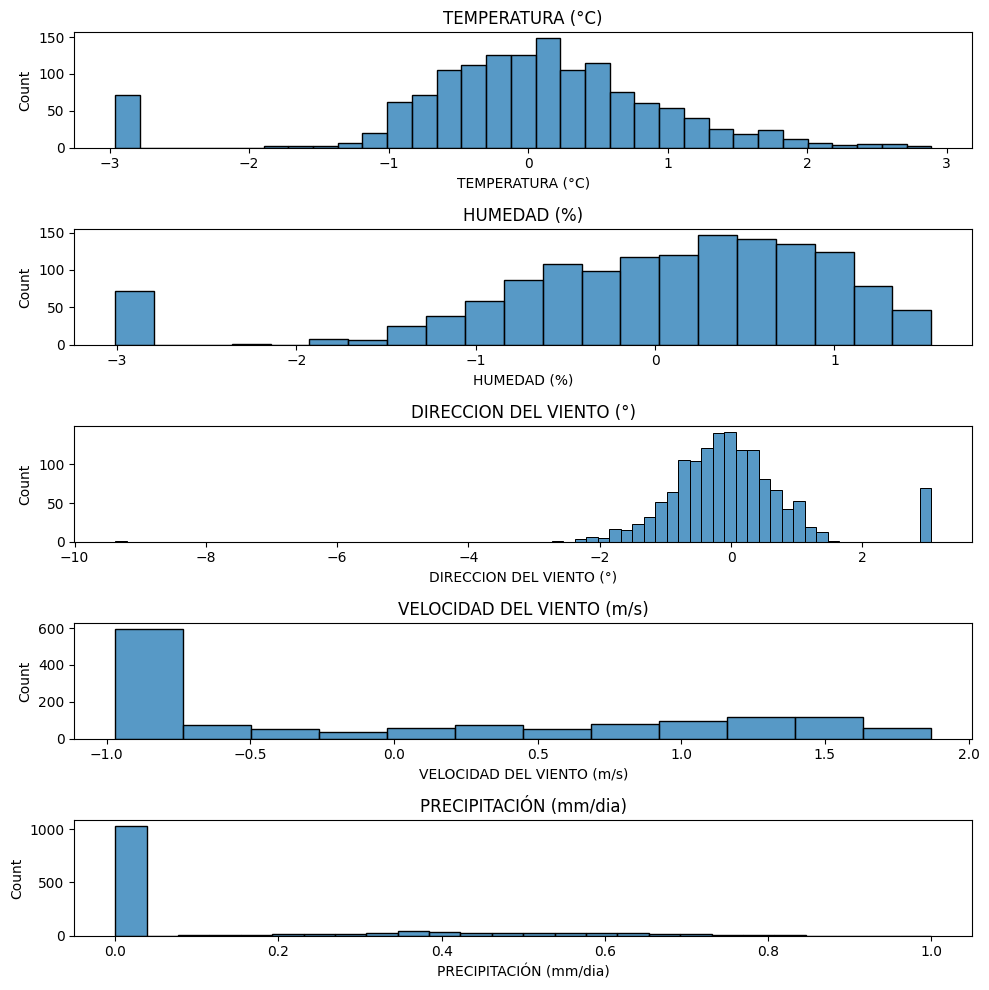

In [ ]:
# prompt: histogramas de todas las variables  en un solo cuadro

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numerical variables
numerical_variables = data_trans.select_dtypes(include=np.number).columns

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(numerical_variables), 1, figsize=(10, 10))

# Plot the histogram for each variable
for i, variable in enumerate(numerical_variables):
  sns.histplot(data_trans[variable], ax=axes[i])
  axes[i].set_title(variable)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import anderson, shapiro

# Variables
variables = ['TEMPERATURA (°C)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)', 'VELOCIDAD DEL VIENTO (m/s)', 'PRECIPITACIÓN (mm/dia)']
data_values = data_trans[variables].values.flatten()

# Anderson-Darling test
res_anderson = anderson(data_values)
print("Anderson-Darling test:")
for i, variable in enumerate(variables):
    print(f"Variable: {variable}")
    print(f"Estadístico de Anderson: {res_anderson.statistic}")
    print(f"Valores críticos: {res_anderson.critical_values}")
    print(f"Niveles de significancia: {res_anderson.significance_level}")
    for j, cv in enumerate(res_anderson.critical_values):
        if res_anderson.statistic > cv:
            print(f"Los datos de la variable '{variable}' no siguen una distribución normal al nivel de significancia {100-res_anderson.significance_level[j]}%")
        else:
            print(f"Los datos de la variable '{variable}' siguen una distribución normal al nivel de significancia {100-res_anderson.significance_level[j]}%")
    print()

# Shapiro-Wilk test
print("Shapiro-Wilk test:")
alpha = 0.05
for i, variable in enumerate(variables):
    stat_shapiro, p_valor_shapiro = shapiro(data_trans[variable])
    print(f"Variable: {variable}")
    print(f"Estadístico Shapiro-Wilk: {stat_shapiro}")
    print(f"p-value: {p_valor_shapiro}")
    if p_valor_shapiro > alpha:
        print(f"Los datos de la variable '{variable}' pueden tener una distribución normal")
    else:
        print(f"Los datos de la variable '{variable}' no siguen una distribución normal")
    print()

Anderson-Darling test:
Variable: TEMPERATURA (°C)
Estadístico de Anderson: 70.55573650244241
Valores críticos: [0.576 0.656 0.787 0.917 1.091]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los datos de la variable 'TEMPERATURA (°C)' no siguen una distribución normal al nivel de significancia 85.0%
Los datos de la variable 'TEMPERATURA (°C)' no siguen una distribución normal al nivel de significancia 90.0%
Los datos de la variable 'TEMPERATURA (°C)' no siguen una distribución normal al nivel de significancia 95.0%
Los datos de la variable 'TEMPERATURA (°C)' no siguen una distribución normal al nivel de significancia 97.5%
Los datos de la variable 'TEMPERATURA (°C)' no siguen una distribución normal al nivel de significancia 99.0%

Variable: HUMEDAD (%)
Estadístico de Anderson: 70.55573650244241
Valores críticos: [0.576 0.656 0.787 0.917 1.091]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los datos de la variable 'HUMEDAD (%)' no siguen una distribución normal al nivel de 

Grafico de la variable Y

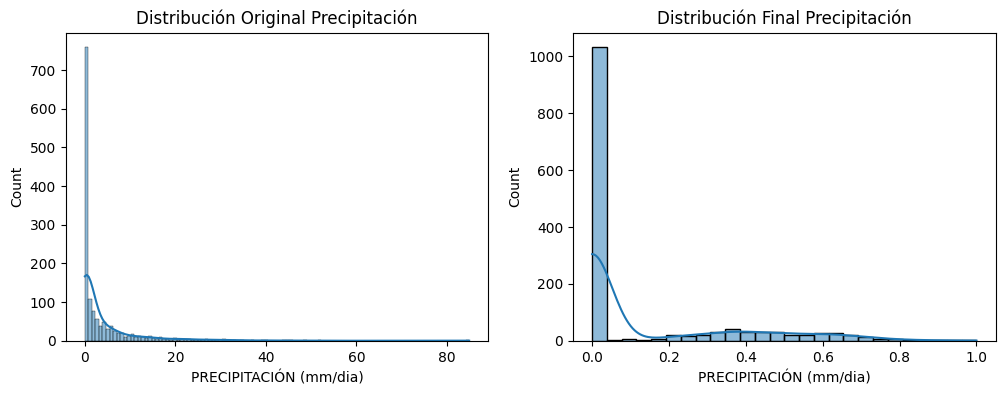

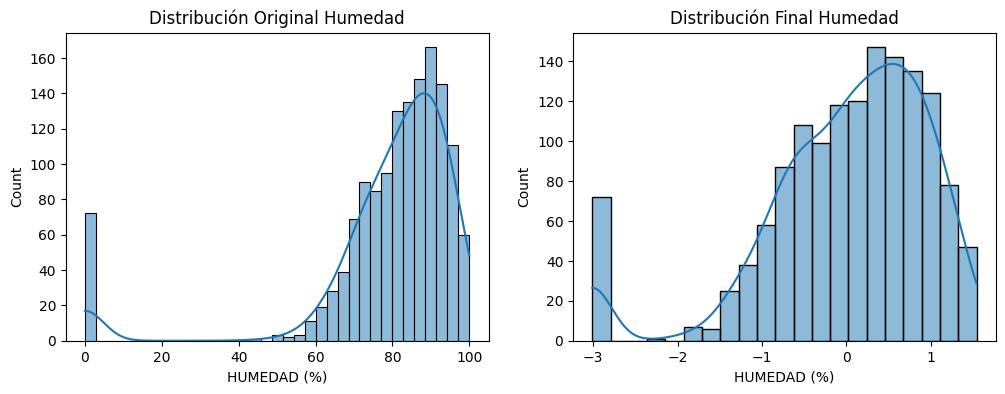

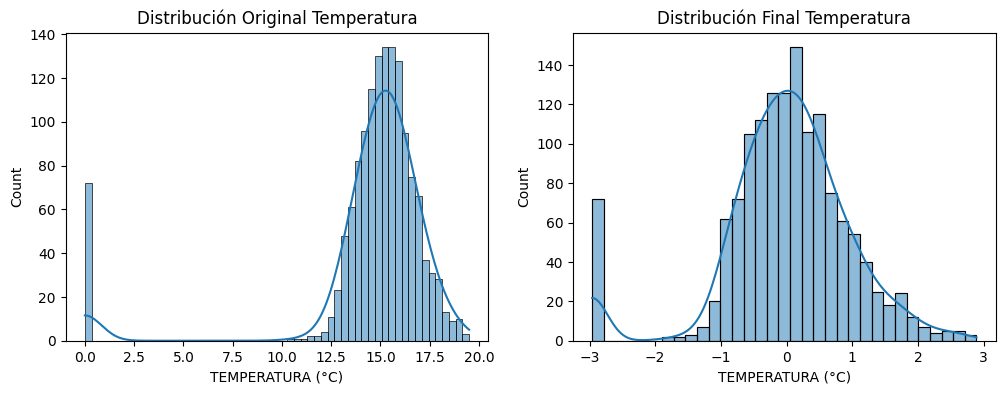

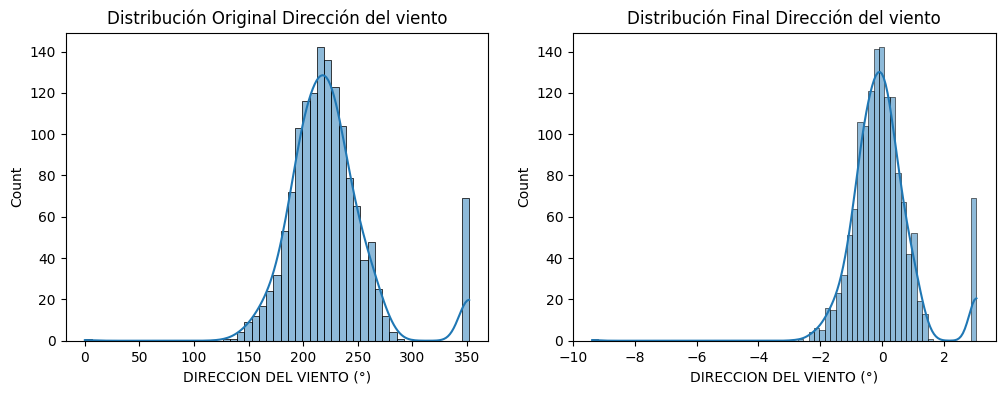

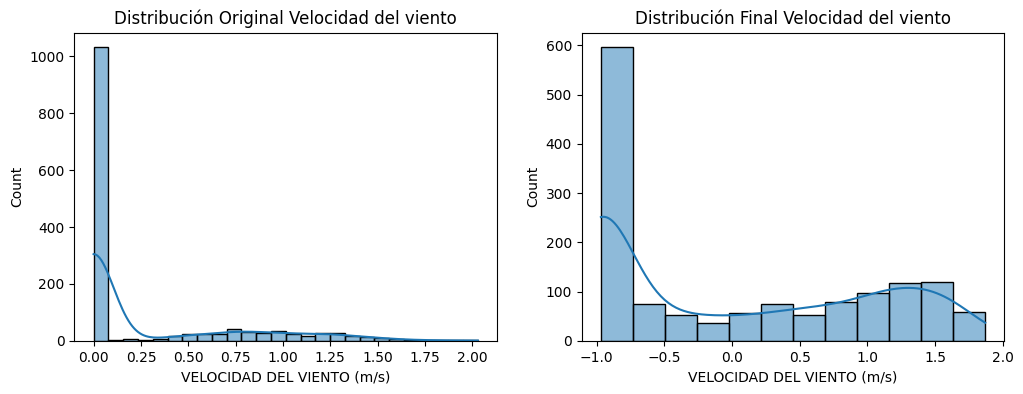

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data_diario_imp_nofecha['PRECIPITACIÓN (mm/dia)'], kde=True)
plt.title('Distribución Original Precipitación')
plt.subplot(1, 2, 2)
sns.histplot(data_trans['PRECIPITACIÓN (mm/dia)'], kde=True)
plt.title('Distribución Final Precipitación')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data_diario_imp_nofecha['HUMEDAD (%)'], kde=True)
plt.title('Distribución Original Humedad')
plt.subplot(1, 2, 2)
sns.histplot(data_trans['HUMEDAD (%)'], kde=True)
plt.title('Distribución Final Humedad')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data_diario_imp_nofecha['TEMPERATURA (°C)'], kde=True)
plt.title('Distribución Original Temperatura')
plt.subplot(1, 2, 2)
sns.histplot(data_trans['TEMPERATURA (°C)'], kde=True)
plt.title('Distribución Final Temperatura')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data_diario_imp_nofecha['DIRECCION DEL VIENTO (°)'], kde=True)
plt.title('Distribución Original Dirección del viento')
plt.subplot(1, 2, 2)
sns.histplot(data_trans['DIRECCION DEL VIENTO (°)'], kde=True)
plt.title('Distribución Final Dirección del viento')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data_diario_imp_nofecha['VELOCIDAD DEL VIENTO (m/s)'], kde=True)
plt.title('Distribución Original Velocidad del viento')
plt.subplot(1, 2, 2)
sns.histplot(data_trans['VELOCIDAD DEL VIENTO (m/s)'], kde=True)
plt.title('Distribución Final Velocidad del viento')
plt.show()

#################### TEMPERATURA (°C) ####################
                     Histograma                     


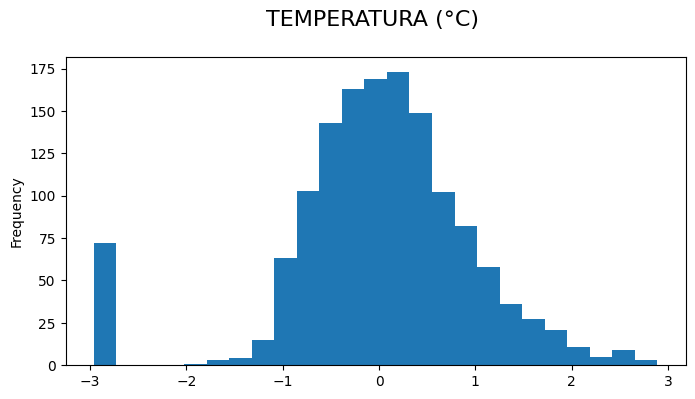



                     Boxplot                     


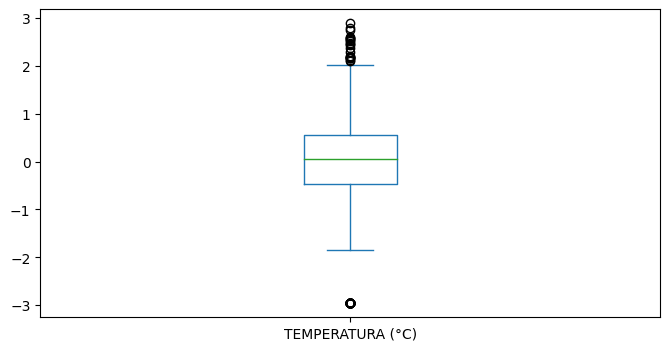




#################### HUMEDAD (%) ####################
                     Histograma                     


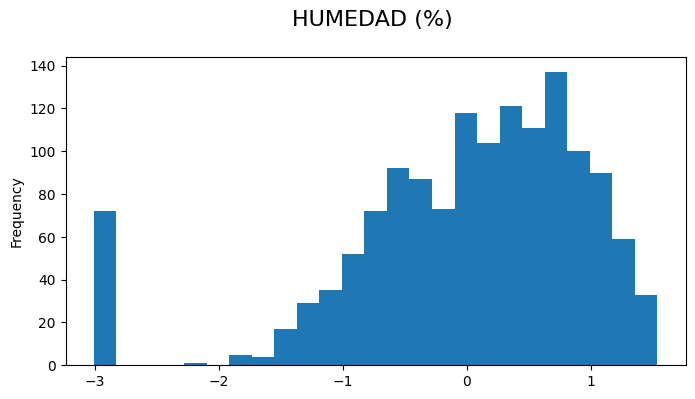



                     Boxplot                     


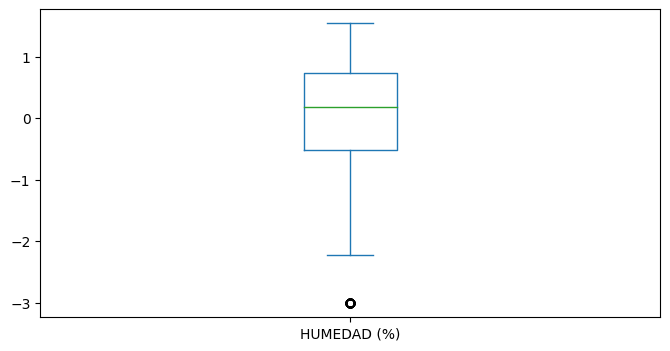




#################### DIRECCION DEL VIENTO (°) ####################
                     Histograma                     


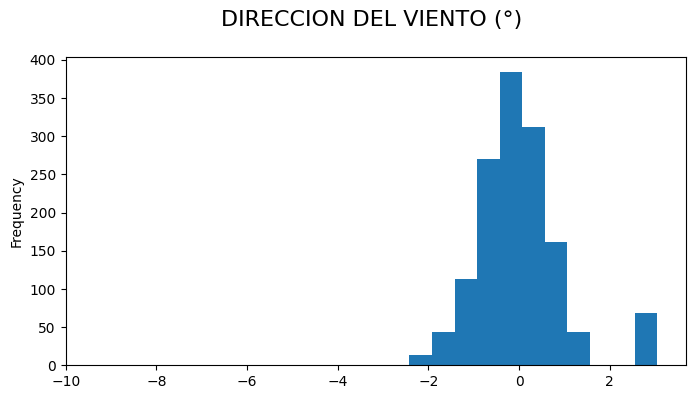



                     Boxplot                     


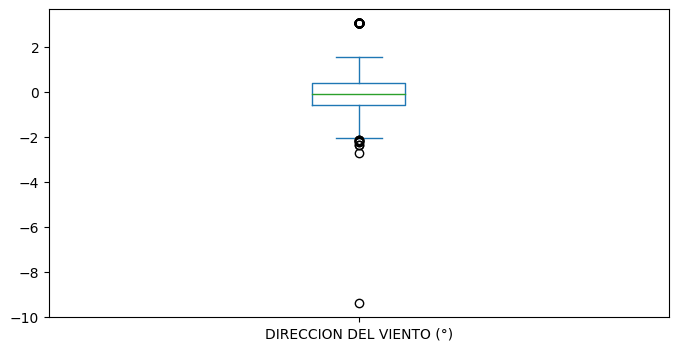




#################### VELOCIDAD DEL VIENTO (m/s) ####################
                     Histograma                     


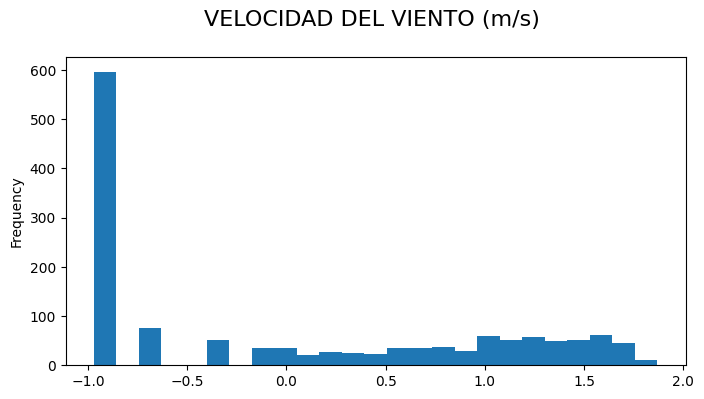



                     Boxplot                     


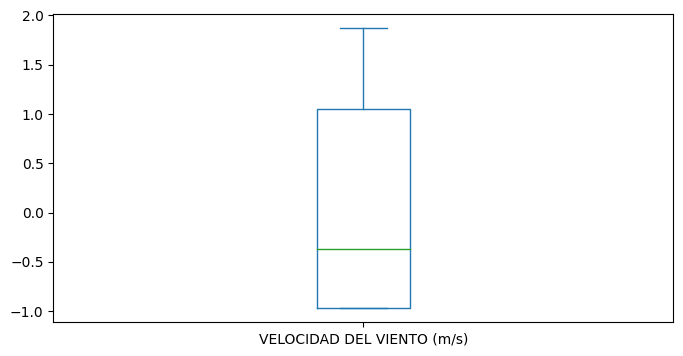




#################### PRECIPITACIÓN (mm/dia) ####################
                     Histograma                     


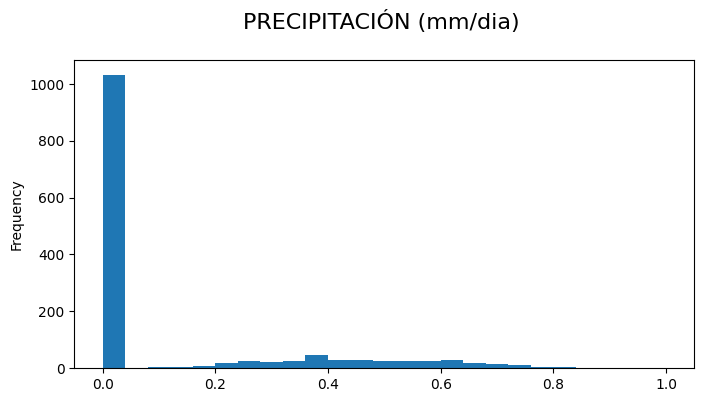



                     Boxplot                     


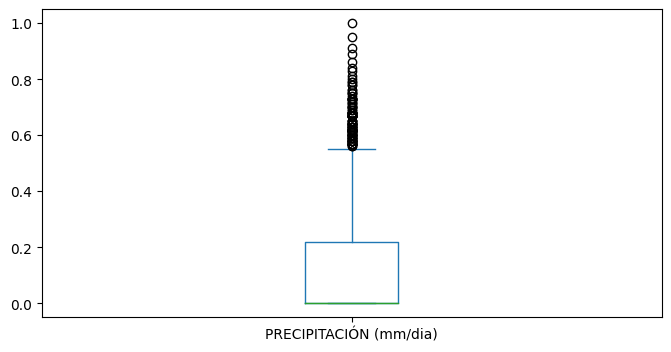

In [ ]:
def analisisNumericas(df, variable):
  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.title(f'{variable} \n',fontdict={'fontsize':16})
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()
for var in data_trans.columns:
  print("#"*20,var,"#"*20)
  analisisNumericas(data_trans, var)
  print("\n\n")

Revision y eliminacion de Outliers

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=c16c7de7154ce11b122ffa9a72c6aeba74c89ffcbee43980da696b25343eb4c0
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


Prueba con ECOD

In [ ]:
from pyod.models.ecod import ECOD
import pandas as pd
clf = ECOD (contamination=0.2)
clf.fit(data_trans)
y_pred = clf.predict(data_trans)
data_sinatip = data_trans[y_pred == 0]

In [ ]:
import numpy as np
plot1 = data_sinatip.select_dtypes(include=np.number)
plot1

,TEMPERATURA (°C),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),PRECIPITACIÓN (mm/dia)
0,0.11,0.65,-0.88,1.15,0.55
1,-0.55,0.71,-0.59,1.58,0.27
2,-0.08,0.34,-0.42,0.99,0.29
5,0.24,-0.16,-0.18,-0.63,0.76
6,0.28,0.25,0.65,-0.97,0.70
...,...,...,...,...,...
1407,0.58,0.45,-0.50,0.99,0.00
1408,0.29,-0.06,-1.21,0.43,0.00
1409,0.34,0.82,-1.54,0.35,0.00
1410,0.31,0.49,-0.72,0.64,0.00


Prueba con KNN

In [ ]:
from pyod.models.knn import KNN
import pandas as pd
clf = KNN (contamination=0.4)
clf.fit(data_trans)
y_pred = clf.predict(data_trans)
PRUEBA123 = data_trans[y_pred == 0]

In [ ]:

plot2 = PRUEBA123.select_dtypes(include=np.number)
plot2


,TEMPERATURA (°C),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),PRECIPITACIÓN (mm/dia)
1,-0.55,0.71,-0.59,1.58,0.27
2,-0.08,0.34,-0.42,0.99,0.29
6,0.28,0.25,0.65,-0.97,0.70
8,-0.77,0.90,0.02,1.15,0.29
11,-0.05,0.24,-0.51,0.69,0.26
...,...,...,...,...,...
1402,0.61,0.51,-1.24,1.15,0.00
1406,0.45,0.74,-0.36,1.53,0.00
1407,0.58,0.45,-0.50,0.99,0.00
1410,0.31,0.49,-0.72,0.64,0.00


In [ ]:
data_trans.shape




(1412, 5)

In [ ]:
PRUEBA123.shape


(1195, 5)

Detección de calores atipicos


In [ ]:
import pandas as pd
import numpy as np

# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF


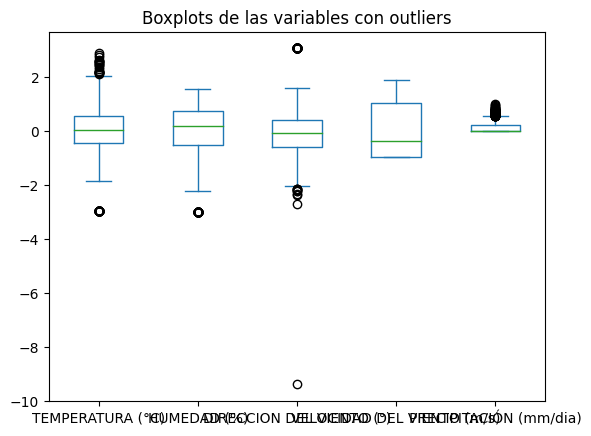

In [ ]:
# prompt: graficos box plot de las variables PRUEBA123

import matplotlib.pyplot as plt
# Boxplot de las variables de PRUEBA123
data_trans.plot(kind="box")
plt.title("Boxplots de las variables con outliers")
plt.show()


In [ ]:
PRUEBA123.describe()

,TEMPERATURA (°C),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),PRECIPITACIÓN (mm/dia)
count,1195.000000,1195.000000,1195.000000,1195.00000,1195.000000
mean,-0.044762,0.006954,0.021916,-0.02749,0.103657
std,0.973747,1.025190,0.951546,1.02156,0.198588
min,-2.960000,-3.010000,-2.040000,-0.97000,0.000000
25%,-0.450000,-0.520000,-0.550000,-0.97000,0.000000
50%,0.040000,0.220000,-0.100000,-0.63000,0.000000
75%,0.490000,0.745000,0.340000,1.05000,0.000000
max,2.740000,1.510000,3.050000,1.87000,0.910000


In [ ]:
model_names = ['ABOD', 'CBLOF', 'HBOS', 'IForest']
variable_names = ['TEMPERATURA (°C)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)', 'VELOCIDAD DEL VIENTO (m/s)']

# Iterar sobre los modelos y las variables
for i, model_name in enumerate(model_names):
    plt.figure(figsize=(6, 4))
    plt.scatter(data_sinatip['PRECIPITACIÓN (mm/dia)'], data_sinatip[variable_names[i]])
    plt.title(f'{model_name} - Precipitación vs {variable_names[i]}')
    plt.xlabel('PRECIPITACIÓN (mm/dia)')
    plt.ylabel(variable_names[i])
    plt.show()

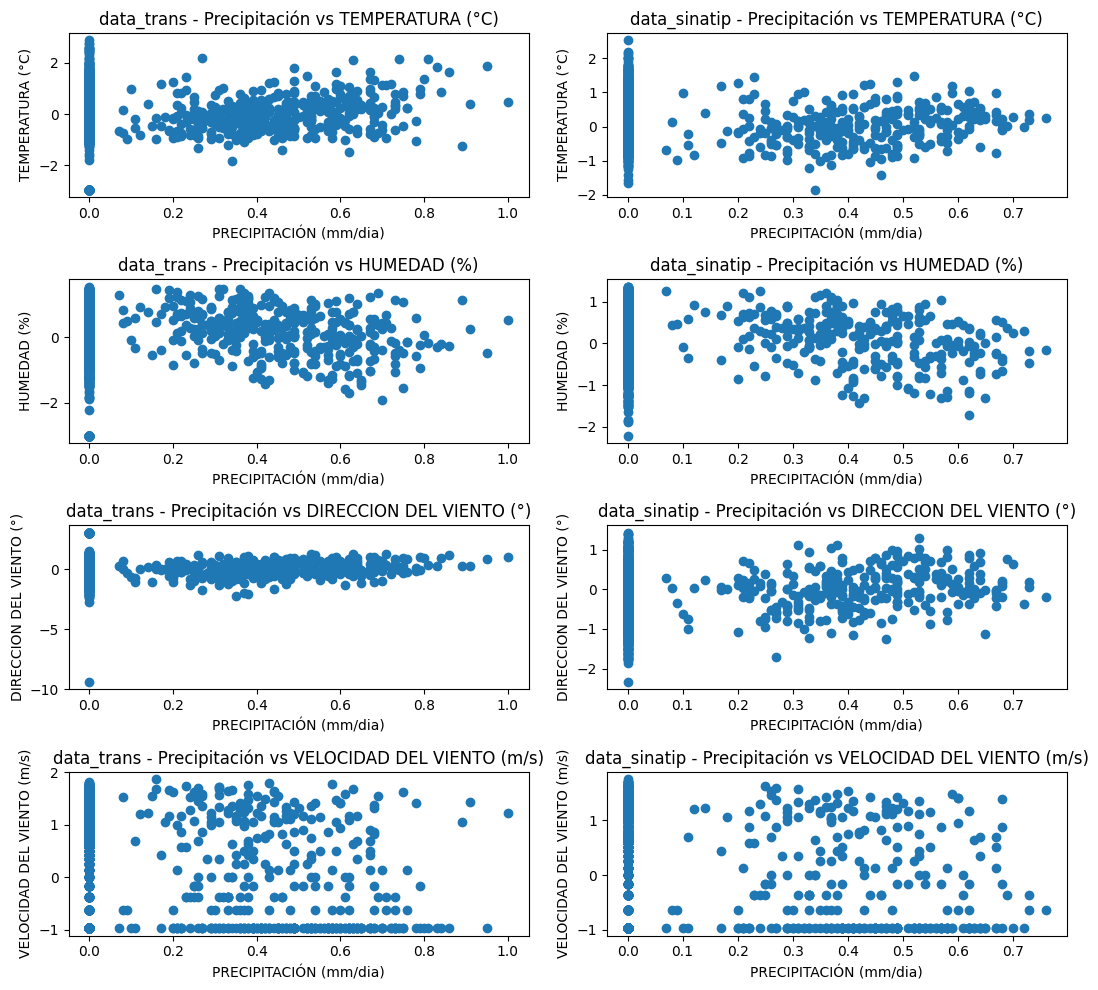

In [ ]:
# prompt: comparacion de graficos de dispersion de  data_trans con data_sinatip

import matplotlib.pyplot as plt

# Define the variables to plot
variables = ['TEMPERATURA (°C)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)', 'VELOCIDAD DEL VIENTO (m/s)']

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(variables), 2, figsize=(11, 10))

# Plot the scatter plot for each variable for data_trans
for i, variable in enumerate(variables):
    axes[i, 0].scatter(data_trans['PRECIPITACIÓN (mm/dia)'], data_trans[variable])
    axes[i, 0].set_title(f'data_trans - Precipitación vs {variable}')
    axes[i, 0].set_xlabel('PRECIPITACIÓN (mm/dia)')
    axes[i, 0].set_ylabel(variable)

# Plot the scatter plot for each variable for data_sinatip
for i, variable in enumerate(variables):
    axes[i, 1].scatter(data_sinatip['PRECIPITACIÓN (mm/dia)'], data_sinatip[variable])
    axes[i, 1].set_title(f'data_sinatip - Precipitación vs {variable}')
    axes[i, 1].set_xlabel('PRECIPITACIÓN (mm/dia)')
    axes[i, 1].set_ylabel(variable)

# Show the plot
plt.tight_layout()
plt.show()


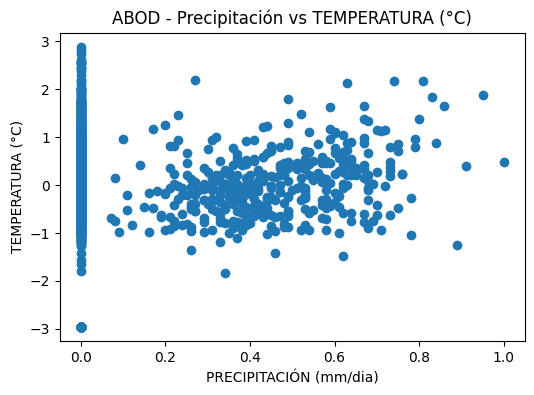

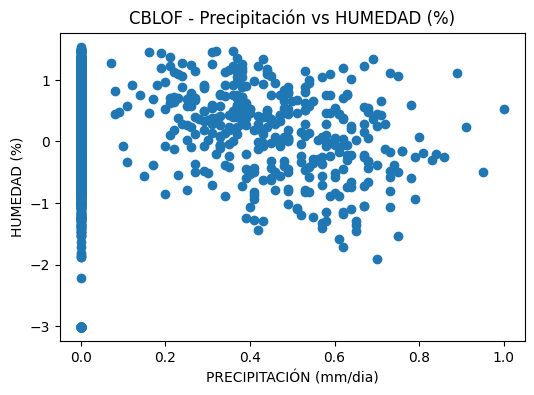

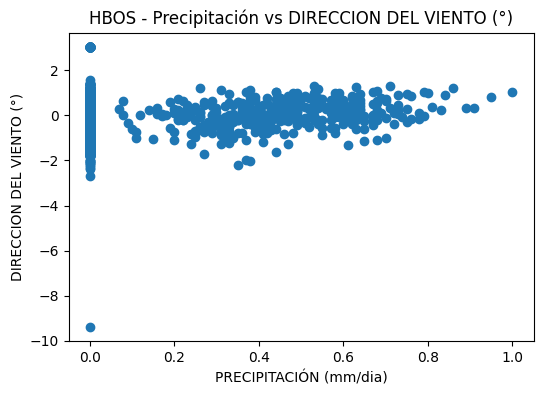

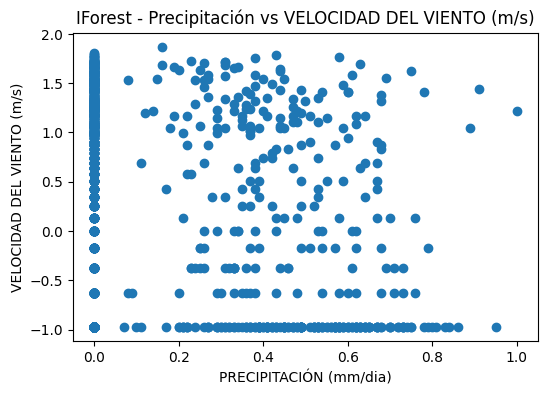

In [ ]:
model_names = ['ABOD', 'CBLOF', 'HBOS', 'IForest']
variable_names = ['TEMPERATURA (°C)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)', 'VELOCIDAD DEL VIENTO (m/s)']

# Iterar sobre los modelos y las variables
for i, model_name in enumerate(model_names):
    plt.figure(figsize=(6, 4))
    plt.scatter(data_trans['PRECIPITACIÓN (mm/dia)'], data_trans[variable_names[i]])
    plt.title(f'{model_name} - Precipitación vs {variable_names[i]}')
    plt.xlabel('PRECIPITACIÓN (mm/dia)')
    plt.ylabel(variable_names[i])
    plt.show()

Analisis de Correlacion

In [ ]:
#correlacion de variables numericas
data_corr = data_diario_imp_nofecha.copy()

# Codificar la columna de precipitación utilizando one-hot encoding
data_corr = pd.get_dummies(data_corr, drop_first=False)

# Mostrar las primeras filas del nuevo DataFrame
data_corr.head()

,TEMPERATURA (°C),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),PRECIPITACIÓN (mm/dia)
0,15.34,90.00,189.25,1.12,5.4
1,14.00,90.80,199.80,0.55,16.8
2,14.97,86.33,206.33,0.58,4.0
3,15.09,94.92,250.96,0.92,14.4
4,13.97,87.38,163.88,0.89,19.6


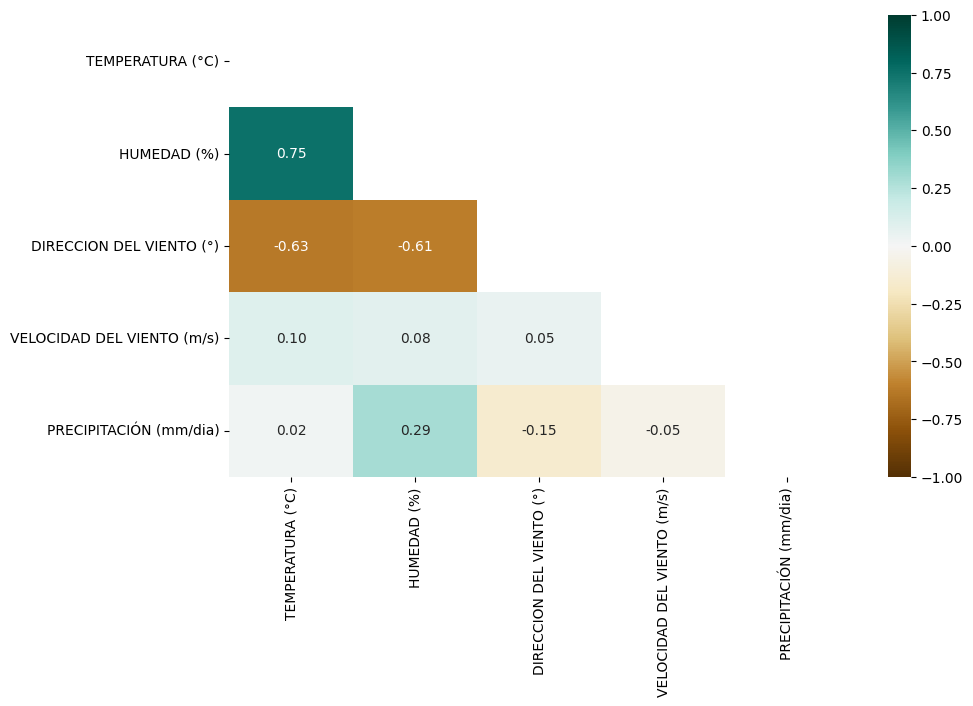

In [ ]:
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(data_corr.corr(), dtype = np.bool))
sns.heatmap(round(data_corr.corr(), 2), mask=mask, cmap="BrBG", annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.show()

Prediccion de precipitacion usando machine learning

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

La precipitación en pulgadas para las características de entrada es: [[4.41444504]]
La tendencia del gráfico de precipitación es: 


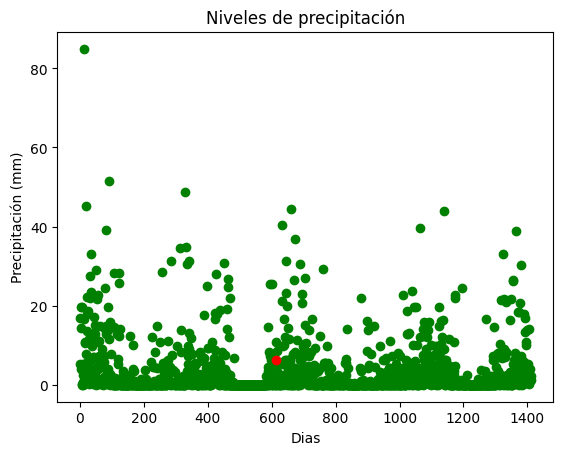

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data analytics/Trabajo final /Rainfall_prediction/Estacion Macchu Picchu/MP_data_diario_imp_nofecha.csv", sep = ",")

X = data.drop(['PRECIPITACIÓN (mm/dia)'], axis=1)

Y = data['PRECIPITACIÓN (mm/dia)']
Y = Y.values.reshape(-1, 1)

dia_index = 614
dias = [i for i in range(Y.size)]

modelo = LinearRegression()
modelo.fit(X, Y)

#Valores de entrada para el modelo
inp = np.array([[15], [85], [220], [0.4]])
inp = inp.reshape(1, -1)

# Imprimir modelo
print('La precipitación en pulgadas para las características de entrada es:', modelo.predict(inp))

print('La tendencia del gráfico de precipitación es: ')
plt.scatter(dias, Y, color='g')
plt.scatter(dias[dia_index], Y[dia_index], color='r')
plt.title('Niveles de precipitación')
plt.xlabel('Dias')
plt.ylabel('Precipitación (mm)')
plt.show()

Gráfico de preciptiación Vs atributos seleccionados : 


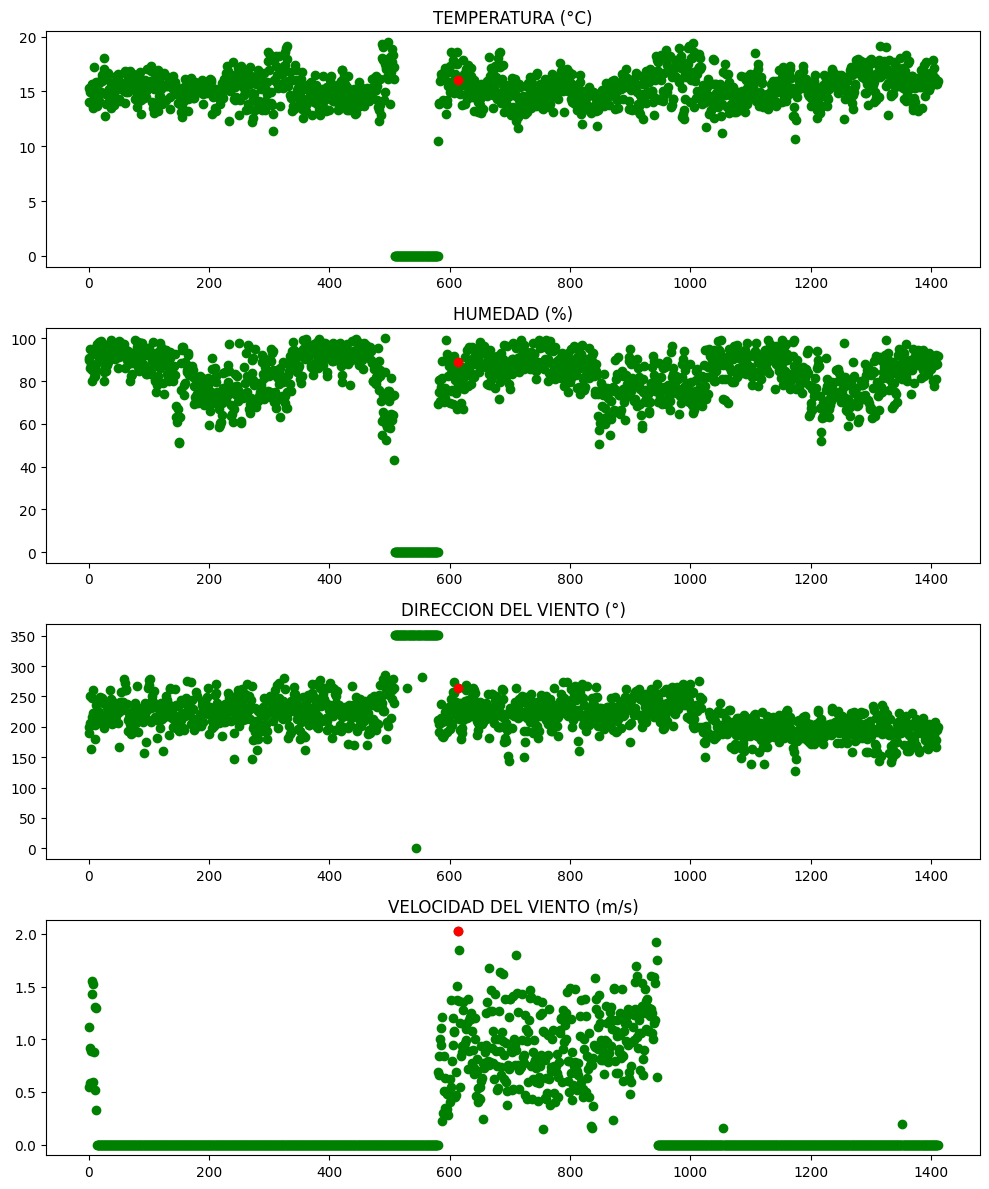

In [ ]:
x_f = X.filter(['TEMPERATURA (°C)', 'HUMEDAD (%)', 'DIRECCION DEL VIENTO (°)',
                'VELOCIDAD DEL VIENTO (m/s)'], axis=1)
plt.figure(figsize=(10, 12))
print('Gráfico de preciptiación Vs atributos seleccionados : ')
for i in range(x_f.columns.size):
    plt.subplot(4, 1, i+1)
    plt.scatter(dias, x_f[x_f.columns.values[i][:100]], color='g')
    plt.scatter(dias[dia_index], x_f[x_f.columns.values[i]]
                [dia_index], color='r')
    plt.title(x_f.columns.values[i])

plt.tight_layout()
plt.show()